In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
columns = ['age', "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
          "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "greater-than-50K"]

In [3]:
df = pd.read_csv("adult.data", sep=",", header=None)

In [4]:
df.columns = columns

In [5]:
df.columns = df.columns.str.lower().str.replace("-", "_").str.strip()

In [6]:
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education_num,13,13,9,7,13
marital_status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [7]:
# find out out which columns contain string entries so we can make them more uniform
df.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
greater_than_50k    object
dtype: object

In [8]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [9]:
# making all the entries lower-case and seperated by undescore
for col in strings:
    df[col] = df[col].str.lower().str.replace("-", "_").str.strip()
    

In [10]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,greater_than_50k
0,39,state_gov,77516,bachelors,13,never_married,adm_clerical,not_in_family,white,male,2174,0,40,united_states,<=50k
1,50,self_emp_not_inc,83311,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,13,united_states,<=50k
2,38,private,215646,hs_grad,9,divorced,handlers_cleaners,not_in_family,white,male,0,0,40,united_states,<=50k
3,53,private,234721,11th,7,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,united_states,<=50k
4,28,private,338409,bachelors,13,married_civ_spouse,prof_specialty,wife,black,female,0,0,40,cuba,<=50k


## Exploratory data analysis

In [11]:
df.nunique()

age                    73
workclass               9
fnlwgt              21648
education              16
education_num          16
marital_status          7
occupation             15
relationship            6
race                    5
sex                     2
capital_gain          119
capital_loss           92
hours_per_week         94
native_country         42
greater_than_50k        2
dtype: int64

In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print("unique values: ", df[col].nunique())
    print()
    

age
[39 50 38 53 28]
unique values:  73

workclass
['state_gov' 'self_emp_not_inc' 'private' 'federal_gov' 'local_gov']
unique values:  9

fnlwgt
[ 77516  83311 215646 234721 338409]
unique values:  21648

education
['bachelors' 'hs_grad' '11th' 'masters' '9th']
unique values:  16

education_num
[13  9  7 14  5]
unique values:  16

marital_status
['never_married' 'married_civ_spouse' 'divorced' 'married_spouse_absent'
 'separated']
unique values:  7

occupation
['adm_clerical' 'exec_managerial' 'handlers_cleaners' 'prof_specialty'
 'other_service']
unique values:  15

relationship
['not_in_family' 'husband' 'wife' 'own_child' 'unmarried']
unique values:  6

race
['white' 'black' 'asian_pac_islander' 'amer_indian_eskimo' 'other']
unique values:  5

sex
['male' 'female']
unique values:  2

capital_gain
[ 2174     0 14084  5178  5013]
unique values:  119

capital_loss
[   0 2042 1408 1902 1573]
unique values:  92

hours_per_week
[40 13 16 45 50]
unique values:  94

native_country
['united

In [13]:
df['us_native'] = (df['native_country'] == 'united_states').astype(int)

In [14]:
def trans_func(x):
    if x == 'united_states':
        return 'united_states'
    else:
        return 'other'

In [15]:
df['us_native'] = df['native_country'].apply(trans_func)

In [16]:
df.us_native

0        united_states
1        united_states
2        united_states
3        united_states
4                other
             ...      
32556    united_states
32557    united_states
32558    united_states
32559    united_states
32560    united_states
Name: us_native, Length: 32561, dtype: object

In [17]:
df.us_native.value_counts()

united_states    29170
other             3391
Name: us_native, dtype: int64

<AxesSubplot:xlabel='greater_than_50k', ylabel='Count'>

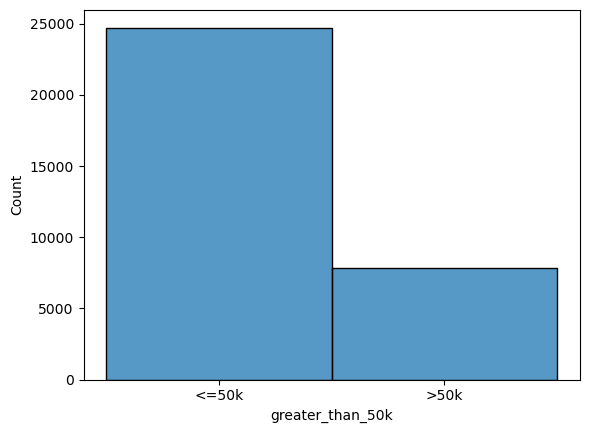

In [18]:
sns.histplot(df.greater_than_50k)

In [19]:
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
greater_than_50k    0
us_native           0
dtype: int64

In [20]:
# for machine learning models we want our target to be expressed in 1 or 0 instead of >50k
# so lets do that 

df.greater_than_50k.value_counts()

<=50k    24720
>50k      7841
Name: greater_than_50k, dtype: int64

In [21]:
# this changes the entries to either 1 or 0
df.greater_than_50k = (df.greater_than_50k == '>50k').astype(int)

In [22]:
df.greater_than_50k.sum()

7841

In [23]:
# now to split the data up into train and test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [24]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [25]:
len(df_train), len(df_val), len(df_test)

(19536, 6512, 6513)

In [26]:
# just so that the indices arent all shuffled up (though it doesnt make any difference to the result)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
# gettnig the target values (note you have to use the .values)
y_train = df_train.greater_than_50k.values
y_val = df_val.greater_than_50k.values
y_test = df_test.greater_than_50k.values


In [28]:
# now we delet the targets from our three datasets.  note we need to use the bracket, dot notation does not work 

del df_train['greater_than_50k']
del df_val['greater_than_50k']
del df_test['greater_than_50k']

### Exploratory data analysis
we will use the df_full_train which we have not deleted the targets from yet

In [29]:
df_full_train.reset_index(drop=True)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,greater_than_50k,us_native
0,39,self_emp_not_inc,188571,11th,7,married_civ_spouse,transport_moving,husband,white,male,0,0,40,united_states,0,united_states
1,54,self_emp_not_inc,105010,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,40,united_states,1,united_states
2,32,private,156464,hs_grad,9,married_civ_spouse,sales,husband,white,male,0,1902,50,united_states,1,united_states
3,45,self_emp_not_inc,32172,some_college,10,never_married,farming_fishing,not_in_family,white,male,0,0,50,united_states,0,united_states
4,60,private,146674,10th,6,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,united_states,0,united_states
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,25,local_gov,514716,bachelors,13,never_married,adm_clerical,own_child,black,female,0,0,40,united_states,0,united_states
26044,32,private,207668,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,15024,0,45,united_states,1,united_states
26045,27,private,104457,bachelors,13,never_married,machine_op_inspct,not_in_family,asian_pac_islander,male,0,0,40,?,0,other
26046,59,state_gov,268700,hs_grad,9,married_civ_spouse,other_service,husband,white,male,0,0,40,united_states,0,united_states


In [30]:
# checking for missing values
df_full_train.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
greater_than_50k    0
us_native           0
dtype: int64

nice! no missing values

In [31]:
# checking how balanced the data set is (in terms of the target)
# Nice little trick here to get them in percentage terms
df_full_train.greater_than_50k.value_counts(normalize=True)

0    0.756066
1    0.243934
Name: greater_than_50k, dtype: float64

In [33]:
# a shorter way to ge the same result
df_full_train.greater_than_50k.mean()

0.24393427518427518

In [34]:
df_full_train.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
greater_than_50k     int64
us_native           object
dtype: object

In [35]:
# to ge the categorical cols
categorical = []
a = dict(df_full_train.dtypes)
for k, c in a.items():
    if a[k] == 'object':
        categorical.append(k)
    
categorical
    

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'us_native']

In [36]:
# to get the numerical cols
numerical = []
b = dict(df_full_train.dtypes)
for k, c in b.items():
    if b[k] == 'int64':
        numerical.append(k)
    
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'greater_than_50k']

In [37]:
# I'm going to manually removes 'greater_than_50k' because that is the target we already took out of our data sets
numerical = ['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [38]:
# to get a sense of how many categories are in the categorical variables
df_full_train[categorical].nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    41
us_native          2
dtype: int64

## Feature Importance

In [39]:
## a way we can look at  how the different features correlate with each other
df_full_train[df_full_train.race == 'white'].greater_than_50k.mean()

0.25910112359550563

that above indicates that around 25 percent of the examples where race is white earn more than 50k

In [40]:
df_full_train[df_full_train.race == 'black'].greater_than_50k.mean()

0.12188254223652453

whereas only around 12 percent of the examples where race is black made more than 50k

In [41]:
df_full_train[df_full_train.race == 'amer_indian_eskimo'].greater_than_50k.mean()

0.12601626016260162

In [42]:
over50k_rate = df_full_train.greater_than_50k.mean()

In [43]:
over50k_rate

0.24393427518427518

In [44]:
df_full_train.race.value_counts(normalize=True)

white                 0.854192
black                 0.095439
asian_pac_islander    0.032786
amer_indian_eskimo    0.009444
other                 0.008139
Name: race, dtype: float64

this dateset is overwhelmingly white

In [45]:
male_rate = df_full_train[df_full_train.sex == 'male'].greater_than_50k.mean()
female_rate = df_full_train[df_full_train.sex == 'female'].greater_than_50k.mean()

print('male_rate: ', male_rate)
print('female_rate: ', female_rate)

male_rate:  0.3091878871300757
female_rate:  0.11182071528100325


In [46]:
df_full_train.sex.value_counts()

male      17436
female     8612
Name: sex, dtype: int64

### we get the risk ratio by dividing the over_50k rate for a group by the global rate

In [47]:
# To get the us_native risk_ratio (though risk is really more appropriate for curn, this is a good us_native_rate = df_full_train[df_full_train.us_native == 'united_statthing)
us_native_rate = df_full_train[df_full_train.us_native == 'united_states'].greater_than_50k.mean()

us_native_rate / over50k_rate

1.0210857294978717

I think this means that being a us_native gives one a around 2 percent higher chance of making more than 50k

In [48]:
non_native_rate = df_full_train[df_full_train.us_native == 'other'].greater_than_50k.mean()

non_native_rate / over50k_rate

0.820192868502788

and being born in another country gave one an around 18 percent less chance of making over 50k

In [49]:
# all that above is too slow though, a better way is
df_full_train.groupby('race').greater_than_50k.mean()

race
amer_indian_eskimo    0.126016
asian_pac_islander    0.274005
black                 0.121883
other                 0.099057
white                 0.259101
Name: greater_than_50k, dtype: float64

In [50]:
df_full_train.groupby('race').greater_than_50k.agg(['mean', 'count'])

,mean,count
race,,
amer_indian_eskimo,0.126016,246
asian_pac_islander,0.274005,854
black,0.121883,2486
other,0.099057,212
white,0.259101,22250


In [51]:
global_over50k_rate = over50k_rate

In [52]:
from IPython.display import display

In [53]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).greater_than_50k.agg(['mean', 'count'])
    df_group_diff = df_group['mean'] - global_over50k_rate
    df_group['risk'] = df_group['mean'] / global_over50k_rate
    display(df_group)
    print()
    print()

workclass


,mean,count,risk
workclass,,,
?,0.102249,1467,0.419168
federal_gov,0.391134,767,1.603441
local_gov,0.295374,1686,1.210874
never_worked,0.000000,6,0.000000
private,0.221744,18111,0.909030
self_emp_inc,0.566225,906,2.321220
self_emp_not_inc,0.282152,2045,1.156671
state_gov,0.285714,1050,1.171276
without_pay,0.000000,10,0.000000




education


,mean,count,risk
education,,,
10th,0.063660,754,0.260974
11th,0.049041,938,0.201040
12th,0.083582,335,0.342642
1st_4th,0.030769,130,0.126137
5th_6th,0.056180,267,0.230307
7th_8th,0.058939,509,0.241619
9th,0.050239,418,0.205954
assoc_acdm,0.253239,849,1.038145
assoc_voc,0.264574,1115,1.084612




marital_status


,mean,count,risk
marital_status,,,
divorced,0.103497,3575,0.424280
married_af_spouse,0.421053,19,1.726090
married_civ_spouse,0.452808,11983,1.856271
married_spouse_absent,0.086310,336,0.353823
never_married,0.046879,8554,0.192177
separated,0.064757,803,0.265470
widowed,0.087404,778,0.358308




occupation


,mean,count,risk
occupation,,,
?,0.101833,1473,0.417461
adm_clerical,0.137815,2975,0.564968
armed_forces,0.166667,6,0.683244
craft_repair,0.231990,3276,0.951036
exec_managerial,0.491038,3236,2.012994
farming_fishing,0.118404,777,0.485394
handlers_cleaners,0.065707,1111,0.269362
machine_op_inspct,0.129032,1612,0.528963
other_service,0.039728,2643,0.162862




relationship


,mean,count,risk
relationship,,,
husband,0.453744,10550,1.860108
not_in_family,0.103734,6642,0.425253
other_relative,0.041667,768,0.170811
own_child,0.013213,4087,0.054165
unmarried,0.064575,2741,0.264723
wife,0.488095,1260,2.000929




race


,mean,count,risk
race,,,
amer_indian_eskimo,0.126016,246,0.516599
asian_pac_islander,0.274005,854,1.123273
black,0.121883,2486,0.499653
other,0.099057,212,0.406079
white,0.259101,22250,1.062176




sex


,mean,count,risk
sex,,,
female,0.111821,8612,0.458405
male,0.309188,17436,1.267505




native_country


,mean,count,risk
native_country,,,
?,0.248971,486,1.020649
cambodia,0.428571,14,1.756914
canada,0.308511,94,1.264729
china,0.278689,61,1.142474
columbia,0.000000,40,0.000000
cuba,0.282051,78,1.156259
dominican_republic,0.030769,65,0.126137
ecuador,0.136364,22,0.559018
el_salvador,0.083333,84,0.341622




us_native


,mean,count,risk
us_native,,,
other,0.200073,2734,0.820193
united_states,0.249078,23314,1.021086


In [54]:
df_full_train.capital_gain.value_counts().sort_index(ascending=False)

99999      125
41310        2
34095        4
27828       26
25236        9
         ...  
914          6
594         24
401          2
114          5
0        23857
Name: capital_gain, Length: 116, dtype: int64

In [55]:
df_full_train.hours_per_week.value_counts().sort_index()

1     14
2     25
3     32
4     48
5     49
      ..
95     1
96     3
97     1
98     9
99    68
Name: hours_per_week, Length: 93, dtype: int64

#### I should have maybe removed some rows where the values were probably fake (max of the dataset).  for instructions on how to do that look in video 6.2 around 8 minutes in, maybe a little earlier.  but really all that should have been done before splitting up into sets, so when you decide to do it, do it earlier in the notebook

In [56]:
len(df_full_train.education.unique())

16

## Mutual Information (3.6)

### A better way to see the importance of the categorical variables

In [57]:
from sklearn.metrics import mutual_info_score

In [58]:
for i in categorical:
    mutual_info = mutual_info_score(df_full_train.greater_than_50k, df_full_train[i])
    print(i, "---->",  mutual_info)

workclass ----> 0.015484660991721078
education ----> 0.06510886597926843
marital_status ----> 0.11041451810505261
occupation ----> 0.06588872485542067
relationship ----> 0.11676318197815819
race ----> 0.00604379173802283
sex ----> 0.02577722046756832
native_country ----> 0.006528153843910634
us_native ----> 0.0006361146801989043


In [60]:
# better way to do it
def mutual_info_rate_score(series):
    return mutual_info_score(series, df_full_train.greater_than_50k)

In [61]:
# applying our mutual_info calculator function to the cattegorical cols and sorting them by most important
df_full_train[categorical].apply(mutual_info_rate_score).sort_values(ascending=False)

relationship      0.116763
marital_status    0.110415
occupation        0.065889
education         0.065109
sex               0.025777
workclass         0.015485
native_country    0.006528
race              0.006044
us_native         0.000636
dtype: float64

## Feature importance: Correlation (3.7)

### while mutual information is for categorical features, correlation is for numerical

In [62]:
# I did this on my own while he was talking
df_full_train.corr()['greater_than_50k'].sort_values(ascending=False)

greater_than_50k    1.000000
education_num       0.335926
hours_per_week      0.234797
age                 0.232541
capital_gain        0.223440
capital_loss        0.149641
fnlwgt             -0.006218
Name: greater_than_50k, dtype: float64

In [63]:
# this is what he showed up in the lesson.  Gets the same result
df_full_train[numerical].corrwith(df_full_train.greater_than_50k).sort_values(ascending=False)

education_num     0.335926
hours_per_week    0.234797
age               0.232541
capital_gain      0.223440
capital_loss      0.149641
fnlwgt           -0.006218
dtype: float64

In [64]:
df_full_train['education_num'].sort_values(ascending=False)

25437    16
19810    16
32222    16
5668     16
16482    16
         ..
24698     1
21388     1
7070      1
26606     1
22167     1
Name: education_num, Length: 26048, dtype: int64

In [65]:
# good way to see how areas of the distribution of a variable fair in terms of the target
df_full_train[df_full_train.education_num > 10].greater_than_50k.mean()

0.43431001890359167

In [66]:
df_full_train[df_full_train.education_num < 10].greater_than_50k.mean()

0.13227918048116977

In [67]:
# if we just want to see the absolute correlations are dont care about whether they are positiv or negative
df_full_train[numerical].corrwith(df_full_train.greater_than_50k).abs().sort_values(ascending=False)

education_num     0.335926
hours_per_week    0.234797
age               0.232541
capital_gain      0.223440
capital_loss      0.149641
fnlwgt            0.006218
dtype: float64

## One-hot encoding

In [68]:
# from video 3.8 (using sklearn)
from sklearn.feature_extraction import DictVectorizer

In [69]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'us_native'],
      dtype='object')

In [70]:
# you dont have to specify the categorical cols, DictVectorizer is smart enogh to recognize them
train_dicts = df_train.to_dict(orient='records')

In [71]:
train_dicts[0]

{'age': 47,
 'workclass': 'private',
 'fnlwgt': 199058,
 'education': 'hs_grad',
 'education_num': 9,
 'marital_status': 'married_civ_spouse',
 'occupation': 'craft_repair',
 'relationship': 'husband',
 'race': 'white',
 'sex': 'male',
 'capital_gain': 0,
 'capital_loss': 0,
 'hours_per_week': 40,
 'native_country': 'united_states',
 'us_native': 'united_states'}

In [72]:
dv = DictVectorizer(sparse=False)

In [73]:
X_train = dv.fit_transform(train_dicts)

In [74]:
X_train.shape

(19536, 109)

## Logistic Regression

### Training Logistic regression with scikit-learn

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
# igot a warning message that it failed to converge when I attempted to train the model with the default parameters.
# and suggested increasing max_iter (default=100) or scaling the data.  I increased the max_iter to 500 and 
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [78]:
# the first column is the probability of it being the negative class, the second column is proba of positive class
model.predict_proba(X_train)[:10]

array([[0.77692266, 0.22307734],
       [0.87744389, 0.12255611],
       [0.71374292, 0.28625708],
       [0.84426864, 0.15573136],
       [0.85064562, 0.14935438],
       [0.81173892, 0.18826108],
       [0.82611208, 0.17388792],
       [0.02955596, 0.97044404],
       [0.56216896, 0.43783104],
       [0.94595451, 0.05404549]])

In [79]:
# create x_val
val_dicts = df_val.to_dict(orient='records')

X_val = dv.transform(val_dicts)

In [80]:
# all the soft predictions that a certain person makes over 50k
y_pred = model.predict_proba(X_val)[:, 1]

In [81]:
over_50 = (y_pred >= 0.5)

In [82]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(y_val, over_50.astype(int))

0.7891584766584766

#### so it appears logistic regression model scores around 79 percent accuracy

In [87]:
df_pred = pd.DataFrame()
df_pred['probabiity'] = y_pred
df_pred['predictition'] = over_50.astype(int)
df_pred['actual'] = y_val

df_pred

,probabiity,predictition,actual
0,0.203657,0,0
1,0.189222,0,0
2,0.328601,0,0
3,0.975702,1,1
4,0.261912,0,0
...,...,...,...
6507,0.184291,0,0
6508,0.284029,0,1
6509,0.124779,0,0
6510,0.199824,0,0


In [88]:
df_pred['correct'] = df_pred.predictition == df_pred.actual

df_pred

,probabiity,predictition,actual,correct
0,0.203657,0,0,True
1,0.189222,0,0,True
2,0.328601,0,0,True
3,0.975702,1,1,True
4,0.261912,0,0,True
...,...,...,...,...
6507,0.184291,0,0,True
6508,0.284029,0,1,False
6509,0.124779,0,0,True
6510,0.199824,0,0,True


In [89]:
# if we get the mean of this correcrt column (where prediction matches actual value) it's the same as our 
# accuracy score
df_pred.correct.mean()

0.7891584766584766

## Using the model (3.12)

In [90]:
### Train the model on the full train dataset 
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [91]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [92]:
y_full_train = df_full_train.greater_than_50k.values

In [93]:
# you can add the fit in the same line if you want (but we wont here)
model = LogisticRegression(max_iter=200)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=200)

In [94]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records') 

In [95]:
X_test = dv.transform(dicts_test)

In [96]:
# getting the predictions on the test set
y_pred_test = model.predict(X_test)

In [97]:
accuracy_score(y_test, y_pred_test)

0.8066943037002917

In [98]:
# or alternatively
y_pred_test = model.predict_proba(X_test)[:, 1]

In [99]:
over_50k = (y_pred_test >= 0.5)

In [100]:
accuracy_score(y_test, over_50k)

0.8066943037002917

### How to use the model

you can take a random customer

In [101]:
dicts_test[11]

{'workclass': 'private',
 'education': 'hs_grad',
 'marital_status': 'married_civ_spouse',
 'occupation': 'craft_repair',
 'relationship': 'husband',
 'race': 'white',
 'sex': 'male',
 'native_country': 'united_states',
 'us_native': 'united_states',
 'age': 31,
 'fnlwgt': 128567,
 'education_num': 9,
 'capital_gain': 0,
 'capital_loss': 0,
 'hours_per_week': 40}

In [102]:
average_joe = {'workclass': 'never_worked',
 'education': 'hs_grad',
 'marital_status': 'married_civ_spouse',
 'occupation': 'craft_repair',
 'relationship': 'husband',
 'race': 'white',
 'sex': 'male',
 'native_country': 'united_states',
 'us_native': 'other',
 'age': 41,
 'fnlwgt': 128567,
 'education_num': 16,
 'capital_gain': 0,
 'capital_loss': 0,
 'hours_per_week': 10}

In [103]:
avg_joe_matrix = dv.transform([average_joe])

In [104]:
model.predict_proba(avg_joe_matrix)

array([[0.70583352, 0.29416648]])

In [105]:
y_test[11]

0

## Video 4.2 Accuracy and dummy model

In [106]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print("%.2f %.3f" %(t, score))
    scores.append(score)

0.00 0.249
0.05 0.250
0.10 0.269
0.15 0.328
0.20 0.471
0.25 0.619
0.30 0.716
0.35 0.758
0.40 0.776
0.45 0.785
0.50 0.789
0.55 0.790
0.60 0.793
0.65 0.793
0.70 0.791
0.75 0.787
0.80 0.780
0.85 0.776
0.90 0.773
0.95 0.771
1.00 0.751


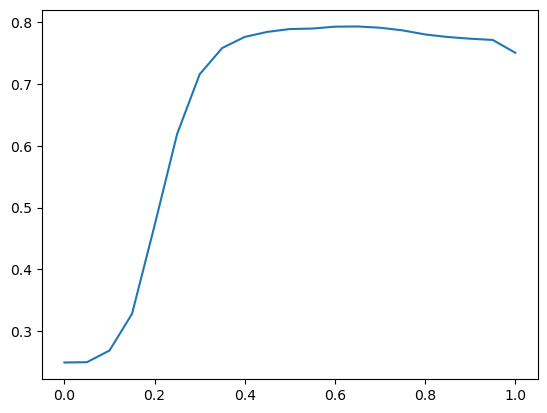

In [107]:
plt.plot(thresholds, scores)

In [108]:
from collections import Counter

In [109]:
Counter(y_pred >= 0.35)

Counter({False: 5544, True: 968})

## 4.3 Confusion table

In [110]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)


In [111]:
len(actual_positive), len(predict_positive)

(6512, 6512)

In [112]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [113]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[4720,  169],
       [1204,  419]])

In [114]:
# normalized confusion matrix
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.72, 0.03],
       [0.18, 0.06]])

## 4.4 Precision and recall

### Precision - fraction of positive predictions that are correct

In [115]:
p = tp / (tp + fp)
p

0.7125850340136054

### Recall - fraction of actual positives that are correcly predicted

In [116]:
r = tp / (tp + fn)
r

0.25816389402341344

## 4.5 ROC curves

In [117]:
tpr = tp / (tp + fn)
tpr

0.25816389402341344

In [118]:
fpr = fp / (fp + tn)
fpr

0.03456739619554101

In [119]:
# recall is the same value as tpr
r == tpr

True

In [120]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))
    

In [121]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

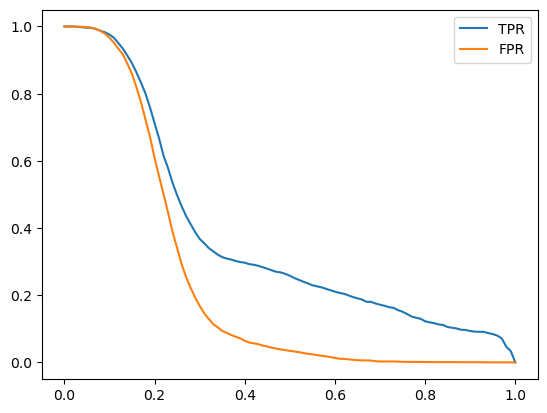

In [122]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [123]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [124]:
((y_rand >= 0.5) == y_val).mean()

0.49063267813267813

In [125]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [126]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

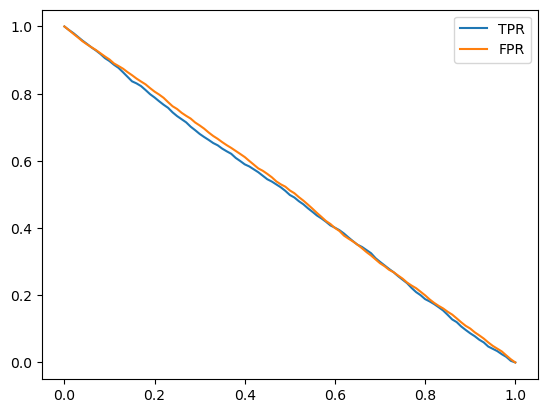

In [127]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

 ### Ideal model                                                                                                                 

In [128]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(4889, 1623)

In [129]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_val))

In [130]:
1 - y_val.mean()

0.7507678132678133

In [131]:
accuracy_score(y_ideal, y_ideal_pred >= .750767)

1.0

In [132]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,1623,4889,0,0,1.000000,1.000000
10,0.1,1623,4237,0,652,1.000000,0.866639
20,0.2,1623,3586,0,1303,1.000000,0.733483
30,0.3,1623,2935,0,1954,1.000000,0.600327
40,0.4,1623,2284,0,2605,1.000000,0.467171
50,0.5,1623,1633,0,3256,1.000000,0.334015
60,0.6,1623,982,0,3907,1.000000,0.200859
70,0.7,1623,331,0,4558,1.000000,0.067703
80,0.8,1303,0,320,4889,0.802834,0.000000
90,0.9,652,0,971,4889,0.401725,0.000000


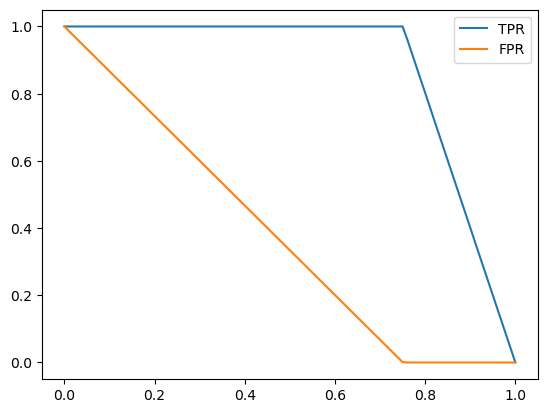

In [133]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

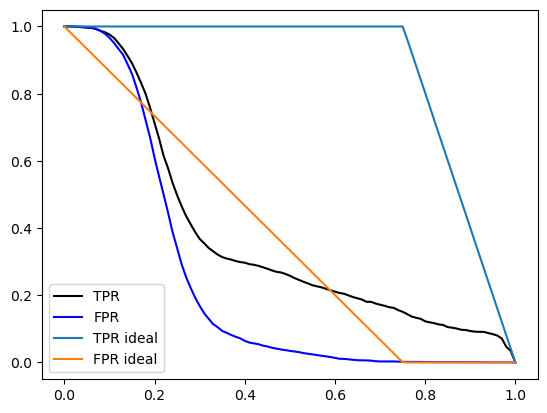

In [134]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

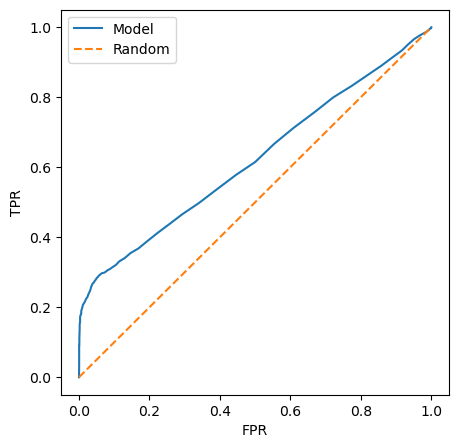

In [135]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

So basically this is telling me that I do not have a good model in that the plot for my model is far too close to 
the plot for a random model

## 4.6 ROC AUC

- a measure of the area under the ROC curve. higher is better

In [136]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [137]:
auc(df_scores.fpr, df_scores.tpr)

0.620843539894342

In [138]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999810960438178

the auc from sklearn just calculates any area under a curve.  so to calculate it we need to use th fpr and tpr

In [139]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.6207366065155384

In [140]:
roc_auc_score(y_val, y_pred)

0.6207366065155384

so basically my first model is not very good, only 62 roc_auc_score, 12 points better than random

the interpretation of auc is that it is the probability that a randomly selected positive example with have a 
higher score than a randomly selected negative example.  

In [141]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [142]:
import random

In [145]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.61988

wow, it really did come out to about the same percentage.  math is amazing

In [146]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.61818

## 4.7 Cross-Validation

In [147]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model
        

In [148]:
dv, model = train(df_train, y_train)

In [149]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred
    

In [150]:
y_pred = predict(df_val, dv, model)

In [151]:
from sklearn.model_selection import KFold

In [152]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [773]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.0 MB/s eta 0:00:00a 0:00:01


In [153]:
from tqdm.auto import tqdm

In [154]:
n_splits = 5

for C in [0, 0.001, 0.01, 0.1, 0]:

    scores = []
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in tqdm(kfold.split(df_full_train), total=n_splits):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        #print(len(df_val))

        y_train = df_train.greater_than_50k.values
        y_val = df_val.greater_than_50k.values

        #print(len(df_train), len(y_train))

        dv, model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)

        #print(len(df_val), len(y_pred))

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
        print("%s %.3f +- %.3f" % (C, np.mean(scores), np.std(scores)))
    
    
    

  0%|          | 0/5 [00:00<?, ?it/s]

0 0.583 +- 0.000
0 0.581 +- 0.002
0 0.581 +- 0.002
0 0.583 +- 0.003
0 0.579 +- 0.008


  0%|          | 0/5 [00:00<?, ?it/s]

0.001 0.583 +- 0.000
0.001 0.581 +- 0.002
0.001 0.581 +- 0.002
0.001 0.583 +- 0.003
0.001 0.579 +- 0.008


  0%|          | 0/5 [00:00<?, ?it/s]

0.01 0.583 +- 0.000
0.01 0.581 +- 0.002
0.01 0.581 +- 0.002
0.01 0.583 +- 0.003
0.01 0.579 +- 0.008


  0%|          | 0/5 [00:00<?, ?it/s]

0.1 0.583 +- 0.000
0.1 0.581 +- 0.002
0.1 0.581 +- 0.002
0.1 0.583 +- 0.003
0.1 0.579 +- 0.008


  0%|          | 0/5 [00:00<?, ?it/s]

0 0.583 +- 0.000
0 0.581 +- 0.002
0 0.581 +- 0.002
0 0.583 +- 0.003
0 0.579 +- 0.008


In [155]:
print("%.3f +- %.3f" % (np.mean(scores), np.std(scores)))

0.579 +- 0.008


I'm not going to bother with cross_validation though cause my dataset is pretty big

 ## 6.3 Decision Trees

In [156]:
from sklearn.tree import DecisionTreeClassifier

### I accidentaly altered df_val a few cells up so I need to remake it

In [157]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [158]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [159]:
len(df_train), len(df_val), len(df_test)

(19536, 6512, 6513)

In [160]:
y_train = df_train.greater_than_50k.values
y_val = df_val.greater_than_50k.values
y_test = df_test.greater_than_50k.values

del df_train['greater_than_50k']
del df_val['greater_than_50k']
del df_test['greater_than_50k']

In [161]:
len(y_train), len(y_val), len(y_test)

(19536, 6512, 6513)

okay back to what they were

In [162]:
train_dicts = df_train.to_dict(orient='records')

In [163]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [164]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [165]:
val_dicts = df_val.to_dict(orient='records')


In [166]:
X_val = dv.transform(val_dicts)

In [167]:
y_pred = dt.predict_proba(X_val)[:, 1]
#y_pred = dt.predict(X_val)

In [168]:
accuracy_score(y_val, y_pred)

0.8049754299754299

In [169]:
roc_auc_score(y_val, y_pred)

0.7435489304330631

In [170]:
# lets try limiting the max_depth
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [171]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [172]:
roc_auc_score(y_val, y_pred)

0.8511174821644325

wow thats a nice jump in quality just from limiting the max_depth to 3.

In [173]:
# If putting in a function be sure to make the defaults the defaults from the docs
def tune_dt_params(max_depth=None, min_samples_leaf=1):
    dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    
    return roc_auc_score(y_val, y_pred)
    
    

In [175]:
for md in range(20, 0, -1):
    print("max_depth=%s -----> %.3f" % (md, tune_dt_params(max_depth=md)))

max_depth=20 -----> 0.800
max_depth=19 -----> 0.812
max_depth=18 -----> 0.825
max_depth=17 -----> 0.831
max_depth=16 -----> 0.843
max_depth=15 -----> 0.847
max_depth=14 -----> 0.857
max_depth=13 -----> 0.861
max_depth=12 -----> 0.869
max_depth=11 -----> 0.879
max_depth=10 -----> 0.888
max_depth=9 -----> 0.891
max_depth=8 -----> 0.894
max_depth=7 -----> 0.893
max_depth=6 -----> 0.889
max_depth=5 -----> 0.880
max_depth=4 -----> 0.867
max_depth=3 -----> 0.851
max_depth=2 -----> 0.821
max_depth=1 -----> 0.746


so max_depth of 8 seems like the clear best value.  although that may be effected by the tuning of other parameters

also I gotta say an 89 roc_auc score seems pretty good to me considering that I started with about a 60 with my logistic regression model

In [176]:
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [177]:
from sklearn.tree import export_text

In [178]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- marital_status=married_civ_spouse <= 0.50
|   |--- capital_gain <= 7073.50
|   |   |--- education_num <= 12.50
|   |   |   |--- class: 0
|   |   |--- education_num >  12.50
|   |   |   |--- class: 0
|   |--- capital_gain >  7073.50
|   |   |--- fnlwgt <= 25827.50
|   |   |   |--- class: 0
|   |   |--- fnlwgt >  25827.50
|   |   |   |--- class: 1
|--- marital_status=married_civ_spouse >  0.50
|   |--- education_num <= 12.50
|   |   |--- capital_gain <= 5095.50
|   |   |   |--- class: 0
|   |   |--- capital_gain >  5095.50
|   |   |   |--- class: 1
|   |--- education_num >  12.50
|   |   |--- capital_gain <= 5095.50
|   |   |   |--- class: 1
|   |   |--- capital_gain >  5095.50
|   |   |   |--- class: 1



/Users/isaachurwitz/opt/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [179]:
df_scores = pd.DataFrame()
max_depth = []
min_samples_leaf = []
aucs = []

for md in [5, 7, 8, 9, 12]:
    print('max_depth: %s' % (md))
    
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500, 1000]:
        auc = tune_dt_params(md, s)
        print("    min_samples_leaf=%4s ----> %.5f" % (s, auc))
        
        max_depth.append(md)
        min_samples_leaf.append(s)
        aucs.append(auc)
          
            
df_scores['max_depth'] = max_depth
df_scores['min_samples_leaf'] = min_samples_leaf
df_scores['auc'] = np.round(aucs, 5)

max_depth: 5
    min_samples_leaf=   1 ----> 0.88012
    min_samples_leaf=   2 ----> 0.87987
    min_samples_leaf=   5 ----> 0.87974
    min_samples_leaf=  10 ----> 0.87973
    min_samples_leaf=  15 ----> 0.87981
    min_samples_leaf=  20 ----> 0.88115
    min_samples_leaf= 100 ----> 0.88289
    min_samples_leaf= 200 ----> 0.88283
    min_samples_leaf= 500 ----> 0.86585
    min_samples_leaf=1000 ----> 0.85079
max_depth: 7
    min_samples_leaf=   1 ----> 0.89261
    min_samples_leaf=   2 ----> 0.89395
    min_samples_leaf=   5 ----> 0.89447
    min_samples_leaf=  10 ----> 0.89546
    min_samples_leaf=  15 ----> 0.89569
    min_samples_leaf=  20 ----> 0.89523
    min_samples_leaf= 100 ----> 0.89324
    min_samples_leaf= 200 ----> 0.89321
    min_samples_leaf= 500 ----> 0.87156
    min_samples_leaf=1000 ----> 0.85080
max_depth: 8
    min_samples_leaf=   1 ----> 0.89377
    min_samples_leaf=   2 ----> 0.89658
    min_samples_leaf=   5 ----> 0.89736
    min_samples_leaf=  10 ----> 0.89939
 

In [180]:
df_scores.sort_values('auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
24,8,15,0.89952
23,8,10,0.89939
25,8,20,0.89925
35,9,20,0.89795
46,12,100,0.89757


In [181]:
# as an experiment I am seeing what what happen if I tune min_samples_leaf first
for s in [1, 2, 5, 10, 15, 20, 100, 200, 500, 1000]:
    print("min_samples_leaf=%3s -----> val_auc: %.3f" % (s, tune_dt_params(min_samples_leaf=s)))

min_samples_leaf=  1 -----> val_auc: 0.744
min_samples_leaf=  2 -----> val_auc: 0.782
min_samples_leaf=  5 -----> val_auc: 0.832
min_samples_leaf= 10 -----> val_auc: 0.867
min_samples_leaf= 15 -----> val_auc: 0.880
min_samples_leaf= 20 -----> val_auc: 0.885
min_samples_leaf=100 -----> val_auc: 0.897
min_samples_leaf=200 -----> val_auc: 0.894
min_samples_leaf=500 -----> val_auc: 0.871
min_samples_leaf=1000 -----> val_auc: 0.851


In [182]:
df_scores = pd.DataFrame()
max_depth = []
min_samples_leaf = []
aucs = []

for s in [10, 15, 20, 100, 110, 200]:
#for md in [5, 7, 8, 9, 12]:
    #print('max_depth: %s' % (md))
    
    for md in [5, 7, 8, 9, 12]:
        auc = tune_dt_params(md, s)
        #print("    min_samples_leaf=%4s ----> %.5f" % (s, auc))
        
        max_depth.append(md)
        min_samples_leaf.append(s)
        aucs.append(auc)
          
            
df_scores['max_depth'] = max_depth
df_scores['min_samples_leaf'] = min_samples_leaf
df_scores['auc'] = np.round(aucs, 3)

In [183]:
df_scores.sort_values('auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
7,8,15,0.900
12,8,20,0.899
2,8,10,0.899
19,12,100,0.898
13,9,20,0.898


### so max_depth=8 and min_leaf_samples=15 appears to be the best

In [185]:
# since I have settled on these values, I will run a cell with those parameters so that is that last dt 
dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=15)

## 6.6 Ensembles and Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [188]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [189]:
roc_auc_score(y_val, y_pred)

0.8961187279351448

In [190]:
def tune_rf(n=100, max_depth=None, min_samples_leaf=1):
    rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    
    auc = roc_auc_score(y_val, y_pred)
    
    return auc

In [191]:
scores = []
for n in range(10, 500, 20):
    auc = tune_rf(n)
    #print("n_estimators: %4s ----> %.4f" % (n, auc))
    scores.append((n, round(auc, 3)))
    

In [194]:
df_scores = pd.DataFrame(scores, columns=['n_esitmators', 'auc']).sort_values(by='auc', ascending=False)
df_scores.head(15)

,n_esitmators,auc
22,450,0.898
21,430,0.898
20,410,0.898
19,390,0.898
18,370,0.898
12,250,0.897
13,270,0.897
23,470,0.897
17,350,0.897
16,330,0.897


so unlike alexey in the video I definitely got higher auc value with more estimators.  However with difference is marginal past a certain point and I notice that there is a delay in training when the estimators get higher

the cell above took entirely too long to run(going up to 500 estimators) and as you can tell the improvemnt was extremely marginal

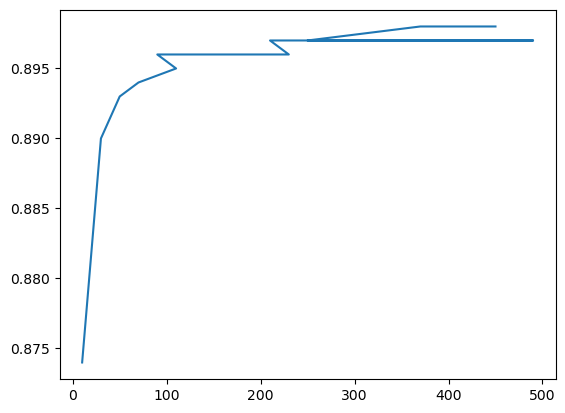

In [195]:
plt.plot(df_scores.n_esitmators, df_scores.auc)

### training the max_depth parameter

In [196]:
scores = []
for d in [10, 15, 20]:

    for n in range(10, 201, 10):
        auc = tune_rf(n, max_depth=d)
        #print("n_estimators: %4s ----> %.4f" % (n, auc))
        scores.append((d, n, round(auc, 3)))

In [197]:
df_scores = pd.DataFrame(scores, columns=["max_depth",'n_esitmators', 'auc']).sort_values(by='auc', ascending=False)
df_scores.head()

,max_depth,n_esitmators,auc
27,15,80,0.912
28,15,90,0.912
26,15,70,0.911
25,15,60,0.911
24,15,50,0.911


The first time I tried tuning the parameters a max_dpeth=5 was universally the worst and 15 is best.  So I am trying upping it.  Second time through 15 was still the best so I will keep that

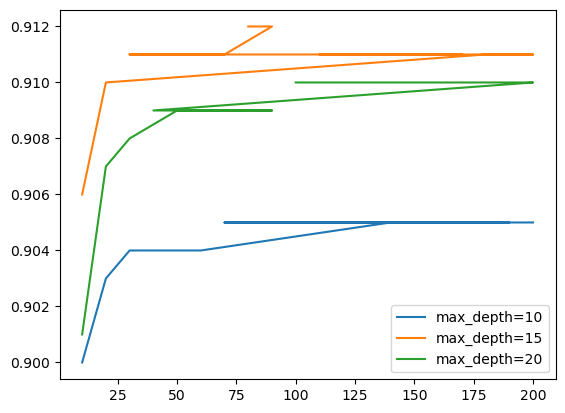

In [198]:
for d in [10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_esitmators, df_subset.auc, label='max_depth=%d' % d)
    
plt.legend()

In [199]:
# as we can see 15 appears to be the best choice for max_depth
max_depth=15

In [200]:
# Now to tune the min_samples leaf
scores = []

for s in [1, 3, 5, 10, 50]:

    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        #print("n_estimators: %4s ----> %.4f" % (n, auc))
        scores.append((s, n, round(auc, 3)))

In [201]:
df_scores = pd.DataFrame(scores, columns=["min_samples_leaf",'n_esitmators', 'auc']).sort_values(by='auc', ascending=False)
df_scores.head(20)

,min_samples_leaf,n_esitmators,auc
7,1,80,0.912
8,1,90,0.912
17,1,180,0.911
11,1,120,0.911
19,1,200,0.911
18,1,190,0.911
16,1,170,0.911
15,1,160,0.911
14,1,150,0.911
13,1,140,0.911


so it looks like we got a little bit of improvement. min_samples_leaf=1 is clearly the winner

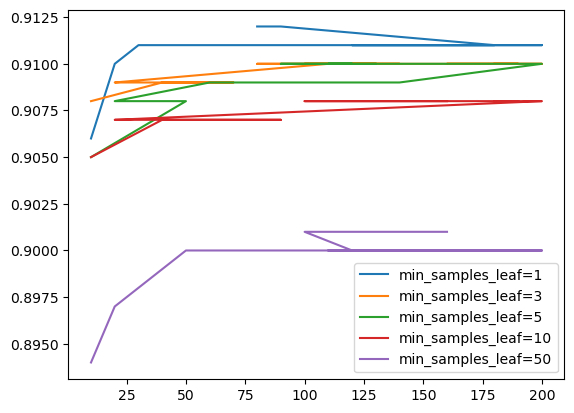

In [202]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_esitmators, df_subset.auc, label='min_samples_leaf=%d' % s)
    
plt.legend()

In [203]:
# Our best parameters found tuning the rf model
max_depth = 15
n_estimators = 80
min_samples_leaf = 1

In [204]:
# so now training a final model with the best parameters
rf = RandomForestClassifier(n_estimators=80,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=1)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=80, random_state=1)

- an idea might be to play with the max_features parameter

## 6.7 Gradient Boosting and XGBoost

In [205]:
import xgboost as xgb

In [206]:
# wrapping dataframe in the DMatrix (which helps the model train faster)
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval =  xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [207]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=30)

In [208]:
y_pred = model.predict(dval)
y_pred

array([0.0309288 , 0.22512588, 0.01109751, ..., 0.01574718, 0.00643183,
       0.5490477 ], dtype=float32)

In [209]:
roc_auc_score(y_val, y_pred)

0.9243016910092912

92 seems pretty good score for not even trying to tune anything.  it's slightly higher than our highest model to date

In [210]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [211]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [212]:
s = output.stdout

In [213]:
line = s.split('\n')[0]

In [214]:
num_iter, train_auc, val_auc = line.split('\t')

In [215]:
int(num_iter.strip('[]'))

0

In [216]:
float(train_auc.split(':')[1])

0.90202

In [217]:
float(val_auc.split(':')[1])

0.88748

In [218]:
for line in s:
    line = s.split('\n')[0]

In [219]:
# I got this function from the notebook in the repository
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [220]:
df_score = parse_xgb_output(output)

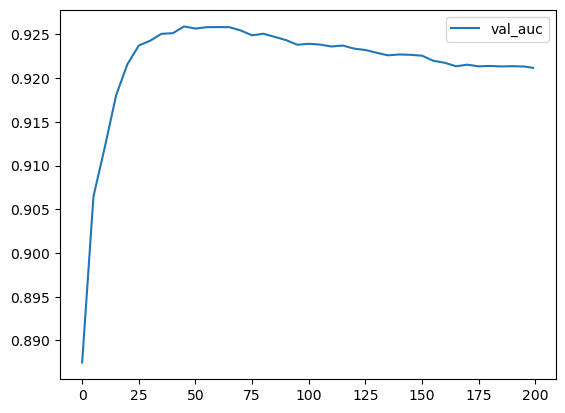

In [221]:
#plt.plot(df_score.num_iter, df_score.train_auc, label='train_auc')
plt.plot(df_score.num_iter, df_score.val_auc, label='val_auc')
plt.legend()

In [222]:
df_score.sort_values('val_auc', ascending=False).head(10)

,num_iter,train_auc,val_auc
9,45,0.95339,0.92590
12,60,0.95635,0.92583
13,65,0.95759,0.92582
11,55,0.95562,0.92582
10,50,0.95463,0.92566
14,70,0.96018,0.92544
8,40,0.95194,0.92513
16,80,0.96236,0.92507
7,35,0.94983,0.92506
15,75,0.96183,0.92489


## 6.8 XGBoost parameter tuning

eta is a learning rate parameter.  it basically determines how much of the previous predictions are used to make the adjustment
.  So it's like a form of regularization

In [241]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [235]:
scores = {}

In [242]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [243]:
scores.keys()

dict_keys(['eta=1.0', 'eta=0.3', 'eta=0.1'])

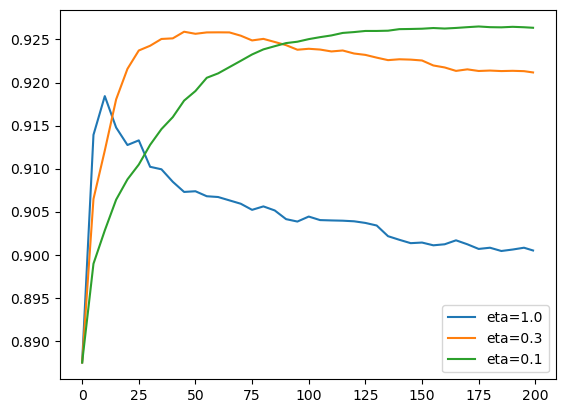

In [244]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.legend()

hard to say. 0.1 seems like it reaches the best performnce overall but it's only slightly better than 0.3 and it takes many more iterations to get there

### Tune the max_depth parameter

In [246]:
# resetting scores to empy and I set the eta in xgb_params to 0.3 (the best value from tuning, at least the one I 
# chose considering the tradeoff of performance vs. iterations needed)
scores = {}

In [260]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [261]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

In [262]:
scores.keys()

dict_keys(['max_depth=10', 'max_depth=6', 'max_depth=3', 'max_depth=4'])

In [263]:
scores['max_depth=4'].sort_values('val_auc', ascending=False).head()

,num_iter,train_auc,val_auc
18,90,0.94842,0.92685
20,100,0.94968,0.92670
19,95,0.94899,0.92668
17,85,0.94810,0.92665
21,105,0.95015,0.92654


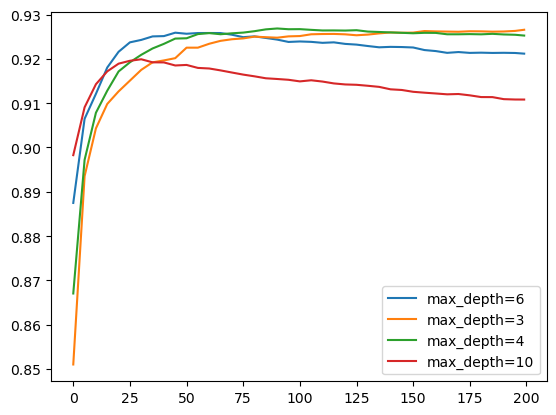

In [264]:
ds = ['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10']

for d in ds:
    df_score = scores[d]
    plt.plot(df_score.num_iter, df_score.val_auc, label=d)

plt.legend()

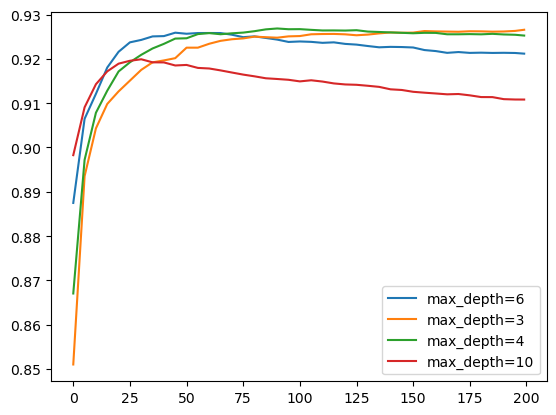

In [1254]:
# this is with eta=0.3
ds = ['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10']

for d in ds:
    df_score = scores[d]
    plt.plot(df_score.num_iter, df_score.val_auc, label=d)

plt.legend()

In [265]:
#max_depth=10 is the worst below so just take it out to focus on the others
del scores['max_depth=10']

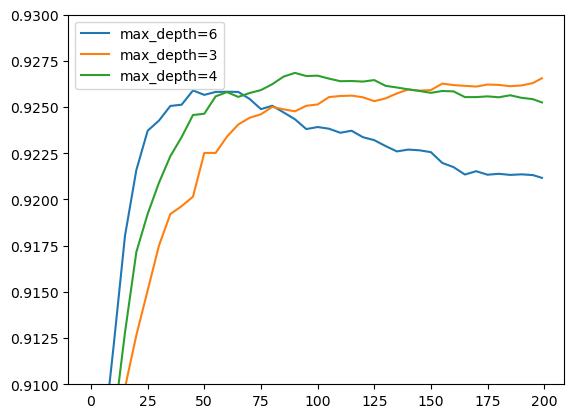

In [266]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.91, 0.93)
plt.legend()

In [267]:
# .92651 is the best performance reached with eta of 0.1 and max_depth=6 at the 175 iteration
# .92656 was reached with eta of 0.3, max_depth=3 at 199 iteration
# 0.92685 was reached with eta=0.3, max_depth=4 at 90 iteraion

Best performance for xgboost max_depth tuning:0.92685 was reached with eta=0.3, max_depth=4 at 90 iteraion

### Tune min_child_weight

In [268]:
# setting the previously tuned parameters eta=0.3 and max_depth=4
# clearing out scores
scores = {}

In [277]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [278]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [279]:
scores.keys()

dict_keys(['min_child_weight=30', 'min_child_weight=10', 'min_child_weight=1'])

In [280]:
scores['min_child_weight=1'].sort_values('val_auc', ascending=False).head()

,num_iter,train_auc,val_auc
18,90,0.94842,0.92685
20,100,0.94968,0.92670
19,95,0.94899,0.92668
17,85,0.94810,0.92665
21,105,0.95015,0.92654


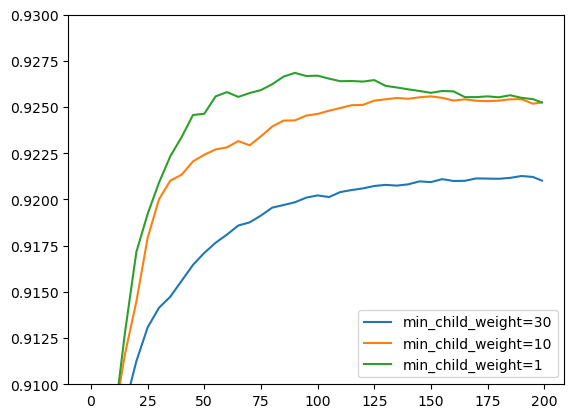

In [281]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.91, 0.93)
plt.legend()

default min_child_weight=1 works better than increasing it.

#### so my best xgb parameters are eta=0.3, max_depth=4, min_child_weight=1 trained for 90 iterations

In [283]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=90,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.87929	val-auc:0.86704
[5]	train-auc:0.90746	val-auc:0.89721
[10]	train-auc:0.91845	val-auc:0.90783
[15]	train-auc:0.92499	val-auc:0.91281
[20]	train-auc:0.92986	val-auc:0.91715
[25]	train-auc:0.93314	val-auc:0.91922
[30]	train-auc:0.93564	val-auc:0.92091
[35]	train-auc:0.93770	val-auc:0.92234
[40]	train-auc:0.93946	val-auc:0.92338
[45]	train-auc:0.94096	val-auc:0.92457
[50]	train-auc:0.94222	val-auc:0.92464
[55]	train-auc:0.94322	val-auc:0.92558
[60]	train-auc:0.94403	val-auc:0.92581
[65]	train-auc:0.94499	val-auc:0.92555
[70]	train-auc:0.94599	val-auc:0.92576
[75]	train-auc:0.94681	val-auc:0.92592
[80]	train-auc:0.94735	val-auc:0.92624
[85]	train-auc:0.94810	val-auc:0.92665
[89]	train-auc:0.94830	val-auc:0.92668


## 6.9 Selecting the final model

### the best versions of each model

In [284]:
dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=15)

In [285]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("dt classififier best performance: %.3f" % (auc))

dt classififier best performance: 0.900


In [286]:
rf = RandomForestClassifier(n_estimators=80,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=1)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=80, random_state=1)

In [287]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("rf classififier best performance: %.3f" % (auc))

rf classififier best performance: 0.912


In [288]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dtrain, num_boost_round=90,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.87929	val-auc:0.86704
[5]	train-auc:0.90746	val-auc:0.89721
[10]	train-auc:0.91845	val-auc:0.90783
[15]	train-auc:0.92499	val-auc:0.91281
[20]	train-auc:0.92986	val-auc:0.91715
[25]	train-auc:0.93314	val-auc:0.91922
[30]	train-auc:0.93564	val-auc:0.92091
[35]	train-auc:0.93770	val-auc:0.92234
[40]	train-auc:0.93946	val-auc:0.92338
[45]	train-auc:0.94096	val-auc:0.92457
[50]	train-auc:0.94222	val-auc:0.92464
[55]	train-auc:0.94322	val-auc:0.92558
[60]	train-auc:0.94403	val-auc:0.92581
[65]	train-auc:0.94499	val-auc:0.92555
[70]	train-auc:0.94599	val-auc:0.92576
[75]	train-auc:0.94681	val-auc:0.92592
[80]	train-auc:0.94735	val-auc:0.92624
[85]	train-auc:0.94810	val-auc:0.92665
[89]	train-auc:0.94830	val-auc:0.92668


In [289]:
y_pred = model.predict(dval)
auc = roc_auc_score(y_val, y_pred)
print("xgb classififier best performance: %.3f" % (auc))

xgb classififier best performance: 0.927


### Trainng the best model on full training set

In [290]:
# don't think resetting the index is really necessary but he did it in the video
df_full_train = df_full_train.reset_index(drop=True)

In [291]:
df_full_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,greater_than_50k,us_native
0,39,self_emp_not_inc,188571,11th,7,married_civ_spouse,transport_moving,husband,white,male,0,0,40,united_states,0,united_states
1,54,self_emp_not_inc,105010,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,40,united_states,1,united_states
2,32,private,156464,hs_grad,9,married_civ_spouse,sales,husband,white,male,0,1902,50,united_states,1,united_states
3,45,self_emp_not_inc,32172,some_college,10,never_married,farming_fishing,not_in_family,white,male,0,0,50,united_states,0,united_states
4,60,private,146674,10th,6,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,united_states,0,united_states


In [292]:
y_full_train = df_full_train.greater_than_50k.values

In [293]:
# removing target from df_full_train
del df_full_train['greater_than_50k']

In [294]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [295]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                        feature_names=dv.get_feature_names_out())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())

In [296]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train(xgb_params, dfulltrain, num_boost_round=90)

In [297]:
y_pred = model.predict(dtest)

In [298]:
roc_auc_score(y_test, y_pred)

0.924557800446421

### Saving the model with BentoML

In [87]:
import bentoml

In [1320]:
bentoml.xgboost.save_model(
    'over_50k_classifier',
    model,
    custom_objects={
        'dictVectorizer': dv
    })

Model(tag="over_50k_classifier:fhtdcatadcpibct7", path="/Users/isaachurwitz/bentoml/models/over_50k_classifier/fhtdcatadcpibct7/")